In [1]:
%load_ext autoreload
%autoreload 2
import sys
from tqdm import tqdm

import numpy as np
from scipy import fft
from scipy.signal import convolve
from scipy.constants import pi

import matplotlib.pyplot as plt

import diffractsim as ds

sys.path.append("C:/Users/1167306/py-libs/optics/src/")
import fourierhelper as fo

mm_ = 1e-3
um_ = 1e-6
nm_ = 1e-9

# single square apperture 

In [27]:
U_WAVELENGTH = 500 * nm_
U_WAVENUMBER = 2*np.pi / U_WAVELENGTH
U_PIXELPITCH = 2.0 * um_
U_SIZE_N = 1024
DIST_PROPAGATE = 1


rowvec = U_PIXELPITCH * np.linspace( -U_SIZE_N//2, U_SIZE_N//2-1, U_SIZE_N, dtype=np.float64)
xx, yy =  np.meshgrid( rowvec, rowvec )
U_0_XWIDTH = 100.0 * um_
U_0_YWIDTH = 100.0 * um_

# phase randomization
rng = np.random.default_rng(seed=12)
U_PHASE_STD = 0.000 * U_WAVELENGTH

# U_0_phase = np.exp(1j*2*pi*U_PHASE_STD*rng.random(xx.shape) / U_WAVELENGTH)

CDD_PIXELPITCH = 100.0 * um_
ccd_size_x, ccd_size_y = U_SIZE_N*CDD_PIXELPITCH, U_SIZE_N*CDD_PIXELPITCH
U_0_ALL = []
U_Z_ALL = []

for i in tqdm(range(10)):
    # make initial field
    U_0 = fo.rect2d(xx, yy, 0.0, 0.0, U_0_XWIDTH, U_0_YWIDTH) 
    U_0_phase = np.exp(1j*2*pi*U_PHASE_STD*rng.random(xx.shape) / U_WAVELENGTH)
    U_0 = U_0 * U_0_phase
    U_0_ALL.append(U_0)
    
    # init monochromatic sim
    F = ds.MonochromaticField(U_WAVELENGTH, U_PIXELPITCH*U_SIZE_N, U_PIXELPITCH*U_SIZE_N, U_SIZE_N, U_SIZE_N )
    F.E = U_0.copy()
    F.zoom_propagate(DIST_PROPAGATE, x_interval=[-ccd_size_x/2, ccd_size_x/2], y_interval=[-ccd_size_y/2, ccd_size_y/2])
    U_z = F.E.copy() # diffraction of initial field
    U_Z_ALL.append(U_z)

# # CCD meshgrid i.e. output screen 
# xvec = np.linspace(-ccd_size_x/2, ccd_size_x/2, U_SIZE_N)
# yvec = np.linspace(-ccd_size_y/2, ccd_size_y/2, U_SIZE_N)
# ccd_xx, ccd_yy = np.meshgrid( xvec, yvec )



100%|██████████| 10/10 [00:05<00:00,  1.87it/s]


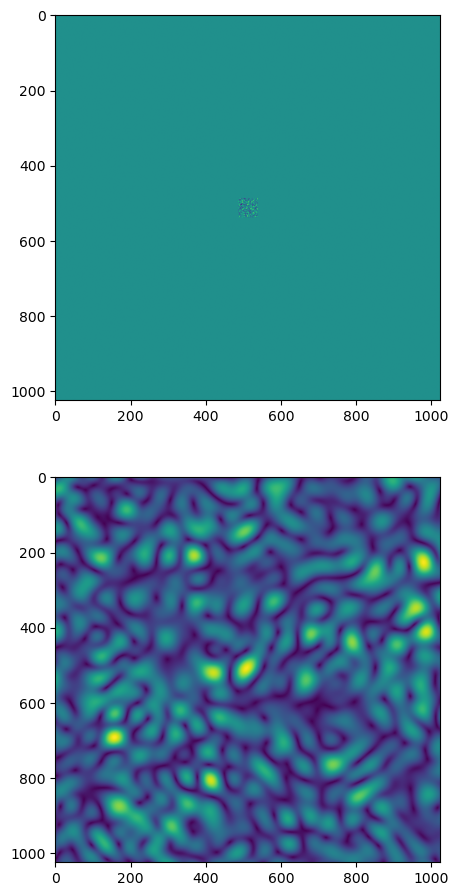

In [23]:
fig, (ax_u0, ax_uz ) = plt.subplots(2,1, figsize=(10,11))

ax_u0.imshow(np.real(U_0_ALL[5]), vmin=-1, vmax=1)

ax_uz.imshow( np.abs(U_Z_ALL[6]) )

plt.show()

In [28]:
I_Z_SUM = np.zeros_like(xx)
U_Z_SUM = np.zeros_like(U_0)
for u in U_Z_ALL:
    I_Z_SUM = I_Z_SUM + np.abs(u)
    U_Z_SUM = U_Z_SUM + u



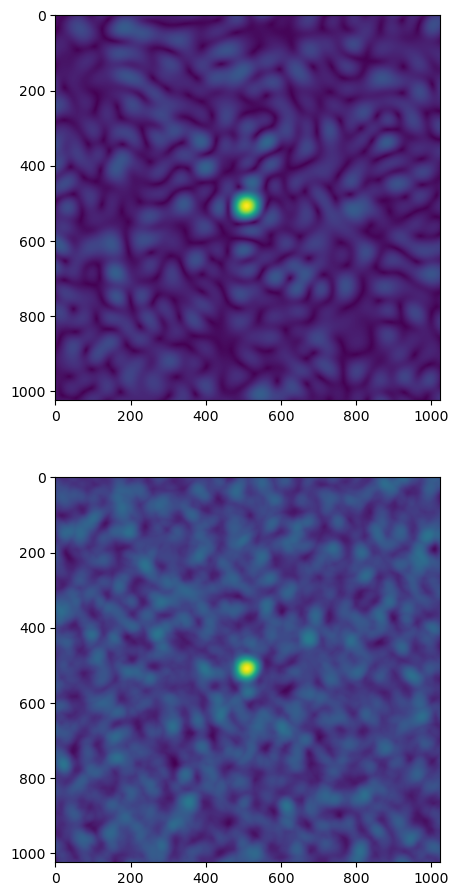

In [25]:
fig, (ax_u0, ax_uz ) = plt.subplots(2,1, figsize=(10,11))

ax_u0.imshow(np.abs(U_Z_SUM))

ax_uz.imshow( I_Z_SUM )

plt.show()

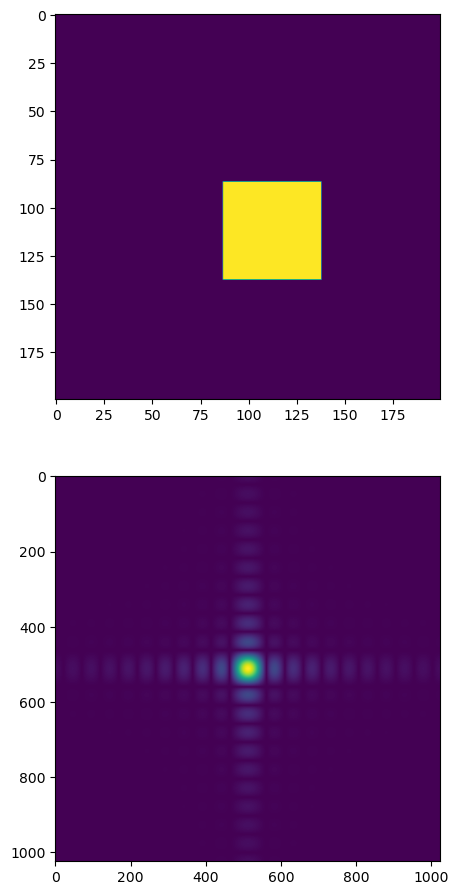

In [31]:
fig, (ax_u0, ax_uz ) = plt.subplots(2,1, figsize=(10,11))

ax_u0.imshow(np.real(U_0_ALL[1][400:600,400:600]))

ax_uz.imshow( I_Z_SUM )

plt.show()